<a href="https://colab.research.google.com/github/pedromonteiro18/Pattern_Recognition/blob/master/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/pedromonteiro18/Pattern_Recognition/blob/master/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.linalg import eigh


mat_content = sio.loadmat('face.mat')
1
# mat_content # Let's see the content... 
np.random.seed(1)

In [0]:
face_data = mat_content['X']
face_labels = mat_content['l']

#transpose to select test and training data
face_data = face_data
face_labels = face_labels

1 [0, 1, 2, 3, 4, 5, 6, 7] 8
2 [8, 9, 10, 11, 12, 13, 14, 15] 8
3 [16, 17, 18, 19, 20, 21, 22, 23] 8
4 [24, 25, 26, 27, 28, 29, 30, 31] 8
5 [32, 33, 34, 35, 36, 37, 38, 39] 8
6 [40, 41, 42, 43, 44, 45, 46, 47] 8
7 [48, 49, 50, 51, 52, 53, 54, 55] 8
8 [56, 57, 58, 59, 60, 61, 62, 63] 8
9 [64, 65, 66, 67, 68, 69, 70, 71] 8
10 [72, 73, 74, 75, 76, 77, 78, 79] 8
11 [80, 81, 82, 83, 84, 85, 86, 87] 8
12 [88, 89, 90, 91, 92, 93, 94, 95] 8
13 [96, 97, 98, 99, 100, 101, 102, 103] 8
14 [104, 105, 106, 107, 108, 109, 110, 111] 8
15 [112, 113, 114, 115, 116, 117, 118, 119] 8
16 [120, 121, 122, 123, 124, 125, 126, 127] 8
17 [128, 129, 130, 131, 132, 133, 134, 135] 8
18 [136, 137, 138, 139, 140, 141, 142, 143] 8
19 [144, 145, 146, 147, 148, 149, 150, 151] 8
20 [152, 153, 154, 155, 156, 157, 158, 159] 8
21 [160, 161, 162, 163, 164, 165, 166, 167] 8
22 [168, 169, 170, 171, 172, 173, 174, 175] 8
23 [176, 177, 178, 179, 180, 181, 182, 183] 8
24 [184, 185, 186, 187, 188, 189, 190, 191] 8
25 [192, 193, 1

<Figure size 1440x720 with 0 Axes>

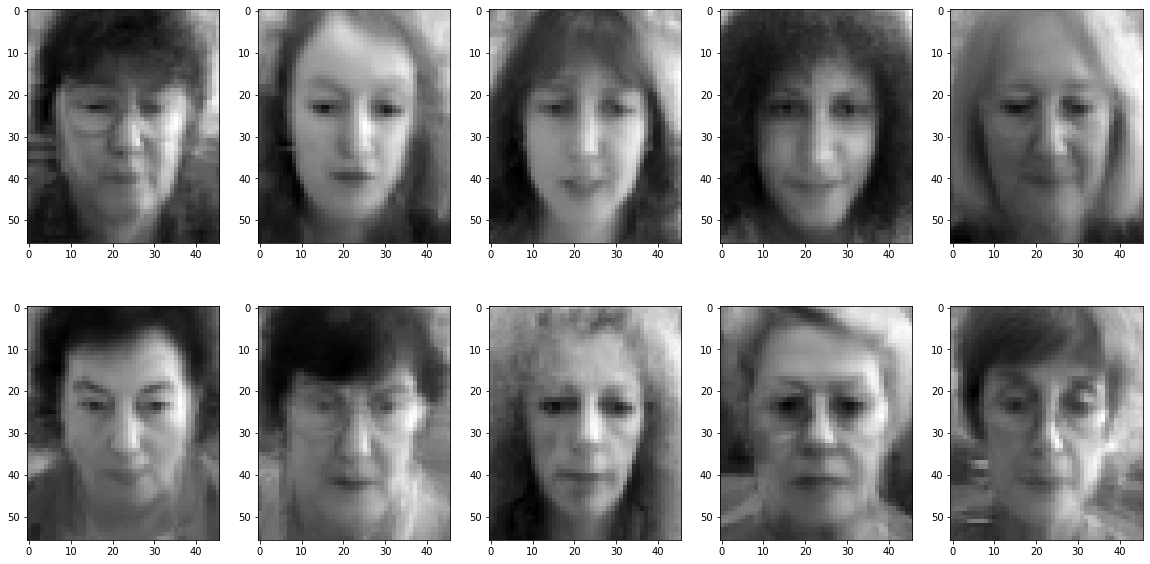

In [27]:
#20/80 test/training split
# data_train, data_test, label_train, label_test = train_test_split(
#     face_data.T, face_labels.T, test_size=0.2, random_state =1 )
# face_data = face_data.T
# face_labels = face_labels.T

data_train = np.reshape(face_data[:,:8],(2576,8))
data_test= np.reshape(face_data[:,8:10],(2576,2))
label_train = np.reshape(face_labels[:,:8],(1,8))
label_test = np.reshape(face_labels[:,8:10],(1,2))


for i in range(10,520,10):
    data_train = np.concatenate((data_train, face_data[:,i:i+8]),axis=1)
    data_test = np.concatenate((data_test, face_data[:,i+8:i+10]),axis=1)
    label_train = np.concatenate((label_train, face_labels[:,i:i+8]),axis=1)
    label_test = np.concatenate((label_test, face_labels[:,i+8:i+10]), axis=1)
    
    
class_indexes = {k : [] for k in range(1, 53)}
for i in range(label_train.shape[1]):
    class_indexes[label_train.T[i].item()].append(i)
    
for i in range(1, len(class_indexes) + 1):
    print(i, class_indexes[i], len(class_indexes[i]))

fig = plt.figure(figsize = (20, 10))

class_means = []

for i in range(1, len(class_indexes)+1):
    temp = np.zeros(2576)
    for k in class_indexes[i]:
        temp += data_train.T[k]
    class_means.append(temp/len(class_indexes[i]))
class_means = np.asarray(class_means)
fig = plt.figure(figsize = (20, 10))

for i in range(10):
    img = np.reshape(class_means[i], (46, 56))
    fig.add_subplot(2, 5, i+1)
    plt.imshow(img.T, cmap = 'gist_gray' )
plt.show()

In [0]:
mean_face = np.mean(data_train, axis = 1)

print('Mean Face Shape {}'.format( mean_face.shape))
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')



In [47]:
print(data_train.shape)
print(label_train.shape)
train_subspaces = []
for i in range(52):
    images = []
    for j in range(int(data_train.shape[1])):
        if label_train.T[j][0] == i+1:
          images.append(data_train.T[j])
    images=np.asarray(images)
    train_subspaces.append(images)
print('    shape:', np.asarray(train_subspaces).shape)

(2576, 416)
(1, 416)
    shape: (52, 8, 2576)


In [0]:
def SWSB(bag_subspaces, X_bar_bag):
    elements = np.asarray(bag_subspaces[0])
    elements_mean = np.mean(elements, axis=0)
    elements = np.subtract(elements,elements_mean)
    S_W = np.matmul(elements.T,elements)
    mean_diff = np.atleast_2d(elements_mean)-X_bar_bag
#     print(mean_diff.shape)
    S_B = np.matmul(mean_diff.T, mean_diff)
    for i in range(1,52):
#         print(i)
        elements = np.asarray(bag_subspaces[i])
#         print(train_subspaces.shape)
        elements_mean = np.mean(elements, axis=0)
        elements = np.subtract(elements,elements_mean)
        S_W += np.matmul(elements.T,elements)
        mean_diff = np.atleast_2d(elements_mean)-X_bar_bag
        S_B += np.matmul(mean_diff.T, mean_diff)
    
    return S_W, S_B

In [70]:
S_W, S_B = SWSB(train_subspaces, mean_face)
rank_SB = np.linalg.matrix_rank(S_B)
rank_SW = np.linalg.matrix_rank(S_W)
print('S_B: {}'.format(S_B.shape))
print('Rank of S_B:', rank_SB)
print('S_W: {}'.format(S_W.shape))
print('Rank of S_W:', rank_SW)

S_B: (2576, 2576)
Rank of S_B: 51
S_W: (2576, 2576)
Rank of S_W: 364


In [103]:
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

def createA(data):
  avg = np.mean(data, axis = 0)
  A = np.empty([0,2576])
  for i in range(len(data)):
    app = np.array([data[i] - avg])
    newA = np.append(A, app, axis = 0)
    A = newA
  A = A.T

  return  A, avg

def createEig(A, S):
  eigvals, eigvecs = np.linalg.eig(S)
  eigvecs = preprocessing.normalize(np.real(np.dot(A, eigvecs).T))
  idx = eigvals.argsort()[::-1]   
  eigvals = eigvals[idx]
  eigvecs  = eigvecs[idx, :]
  return eigvals, eigvecs

def PCA(data_train):
  A, avg = createA(data_train)
  #Low-dimensional computation of eigenspace of dataset 1
  S2 = np.dot(A.T, A)*1/len(data_train)
  Meigvals_new, Meigvecs_new = createEig(A, S2)
  return Meigvals_new, Meigvecs_new, A, avg

Meigvals_new, Meigvecs_new, A, avg = PCA(data_train.T)

M_pca = 19
M_lda = 30

M_pca_range = rank_SW
M_lda_range = rank_SB
acc_array = np.empty((M_pca_range, M_lda_range))
M_pca_array = np.arange(1, M_pca_range+1)
M_lda_array = np.arange(1, M_lda_range+1)
M_pca_best = None
M_lda_best = None
acc_max = 0
for M_pca in range(1, M_pca_range):
  for M_lda in range (1, M_lda_range):

    eigvecsM = Meigvecs_new[:M_pca]
    Wpca = np.dot(A.T, eigvecsM.T).T

    X = Wpca.T
    Y = label_train.reshape(label_train.shape[1])
    lda = LinearDiscriminantAnalysis(n_components = M_lda)
    Wlda = lda.fit_transform(X, Y)
    
    nn = KNeighborsClassifier(n_neighbors=1)
    nn.fit(Wlda, label_train.T.ravel())

    W_test = np.dot(eigvecsM, data_test ).T
    W_test_2 = lda.transform(W_test)
    Accuracy = nn.score(W_test_2, label_test.T.ravel())

    
    acc_array[M_pca-1, M_lda-1] = Accuracy

    if (Accuracy > acc_max):
              M_pca_best = M_pca
              M_lda_best = M_lda
              acc_max = Accuracy

print("Accuracy is highest for M_pca:", M_pca_best, "M_lda", M_lda_best)


KeyboardInterrupt: ignored

In [0]:
for x in range(acc_array.shape[0]):
  for y in range(acc_array.shape[1]):
    if acc_array[x][y]>1:
      acc_array[x][y] = 0.3
    if acc_array[x][y]<0:
      acc_array[x][y] = 0.3  

(364, 51)
0.9038461538461539
(364, 51)
(364, 51)
6832


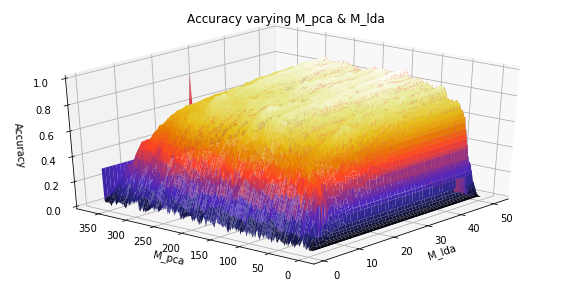

In [102]:

from mpl_toolkits import mplot3d

x = np.linspace(1, M_lda_range, M_lda_range)
y = np.linspace(1, M_pca_range, M_pca_range)

X, Y = np.meshgrid(x, y)

print(acc_array.shape)
print(acc_max)
print(X.shape)
print(Y.shape)
print(acc_array.argmax())
fig = plt.figure(figsize=[10,5])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, acc_array, rstride=1, cstride=1,
                cmap=plt.cm.CMRmap, edgecolor='none')
ax.set_title('Accuracy varying M_pca & M_lda');
ax.set_xlabel('M_lda')
ax.set_ylabel('M_pca')
ax.set_zlim3d(0,1)
ax.set_zlabel('Accuracy');

ax.view_init(30, 220)

Best accuracy is for M_pca = 134, M_lda = 50, Accuracy 90.4%

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90, size=6)
        plt.yticks(tick_marks, target_names, size=6)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     size=3,
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     size=3,
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

<Figure size 432x288 with 0 Axes>

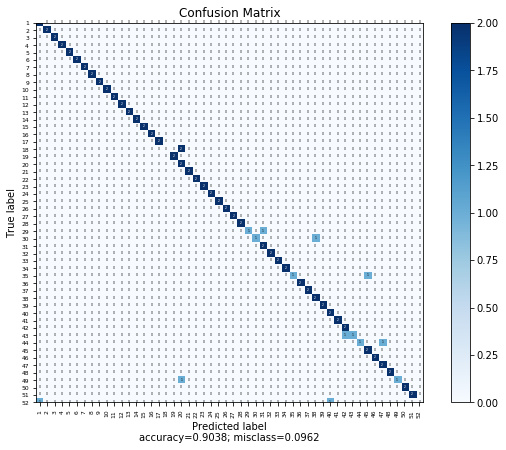

In [108]:
from sklearn.metrics import confusion_matrix
M_pca = 134
M_lda = 50

eigvecsM = Meigvecs_new[:M_pca]
Wpca = np.dot(A.T, eigvecsM.T).T

X = Wpca.T
Y = label_train.reshape(label_train.shape[1])
lda = LinearDiscriminantAnalysis(n_components = M_lda)
Wlda = lda.fit_transform(X, Y)
    
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(Wlda, label_train.T.ravel())

W_test = np.dot(eigvecsM, data_test ).T
W_test_2 = lda.transform(W_test)
Accuracy = nn.score(W_test_2, label_test.T.ravel())   
prediction = nn.predict(W_test_2) 


cfn_matrix = confusion_matrix(label_test.T, prediction)
class_names = np.arange(1,53)
plt.figure()
plot_confusion_matrix(cm           = cfn_matrix, 
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

[49]


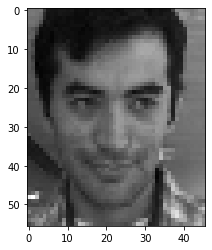

In [130]:
# Example failure
test_face = data_test[:,97]
test_face = np.reshape(test_face,(46,56))
plt.imshow(test_face.T, cmap= 'gist_gray')
print(label_test.T[97])

In [132]:
M_pca = 134
M_lda = 50

eigvecsM = Meigvecs_new[:M_pca]
Wpca = np.dot(A.T, eigvecsM.T).T

X = Wpca.T
Y = label_train.reshape(label_train.shape[1])
lda = LinearDiscriminantAnalysis(n_components = M_lda)
Wlda = lda.fit_transform(X, Y)
    
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(Wlda, label_train.T.ravel())
print(eigvecsM.shape, data_test[:,].shape)
W_test = np.dot(eigvecsM, data_test[:,97].reshape(-1,1)).T
W_test_2 = lda.transform(W_test)
#Accuracy = nn.score(W_test_2, label_test.T.ravel())   
prediction = nn.predict(W_test_2) 

print(prediction)


(134, 2576) (2576, 104)
[20]


8


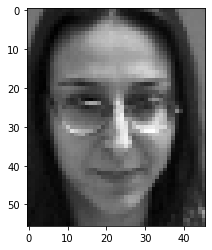

In [133]:
dataLabel = np.array(list(zip(data_train.T,label_train.T)))
output=[]
for i in dataLabel:
    dat, lab = i
    if lab == prediction:
      output.append(np.reshape(dat,(2576,1)))
print(len(output))
# image = data_train[:,13]
# print(image.shape)
image = np.reshape(output[0],(46,56))
plt.imshow(image.T, cmap= 'gist_gray')

In [0]:
M__pca_ideal = 134
M__lda_ideal = 50

In [134]:
print(data_train.shape)

(2576, 416)


In [149]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone

def bagging(n_estimators, max_samples, verbose = False):

    D, N = data_train.shape

    standard = False
    #M__pca_ideal = 134
    #M__lda_ideal = 50

    if verbose:
        print ('M__pca_ideal = ', M__pca_ideal)
        print ('M__lda_ideal = ', M__lda_ideal)

    M_pca_bag = N-1

    M_pca = 134 #M__pca_ideal
    M_lda = 50 #M__lda_ideal

    estimators = [('pca', PCA(n_components=M_pca)), ('lda', LinearDiscriminantAnalysis(n_components=M_lda)), ('knn', KNeighborsClassifier(n_neighbors=1))]

    base_est = Pipeline (estimators)

    base_est.fit(data_train.T, label_train.T.ravel())

    acc = base_est.score(data_test.T, label_test.T.ravel())
    if verbose:
        print ('Accuracy of base estimator with no pre PCA = %.2f%%' % (acc * 100))


    pca = PCA(n_components=M_pca_bag)
    W_train = pca.fit_transform(data_train.T)
    W_test = pca.transform(data_test.T)

    base_est.fit(W_train, label_train.T.ravel())

    acc = base_est.score(W_test, label_test.T.ravel())
    if verbose:
        print ('Accuracy of base estimator with pre PCA applied = %.2f%%' % (acc * 100))

    estimators = []
    sub_model_accuracies = []
    
    W_bag = np.empty((int(max_samples * N), (N-1)))
    y_bag = np.empty((1, int(max_samples * N)))

    for i in range (n_estimators):

        for j in range(int(max_samples * N)):
        
            mask = np.random.choice(np.arange(N), 1, replace=True)
            W_bag[j] = W_train[mask, :]
            y_bag[:, j] = label_train[:, mask]
        
    
        estimator = clone(base_est)

        estimator.fit(W_bag, y_bag.T.ravel())
    
        name = 'est_'+str(i+1)
        estimators.append((name, estimator))
    
        sub_model_acc = estimator.score(W_test, label_test.T.ravel())
        sub_model_accuracies.append(sub_model_acc)
        if verbose:
            print ('Accuracy of sub model ', i+1, ' = %.2f%%' % (sub_model_acc * 100))
    

    ave_sub_model_acc = sum(sub_model_accuracies)/n_estimators
    if verbose:
        print ('Average accuracy of sub models = %.2f%%' % (ave_sub_model_acc * 100))
    
    y_hat = []

    for w in W_test:
        prediction_sum = 0
        predictions = np.empty(n_estimators, dtype = np.int64)
        for i, (name, estimator) in enumerate(estimators):
            y = estimator.predict(w.reshape(1, -1))
        
            prediction_sum = prediction_sum + float(y[0])
            predictions[i] = int(y[0])
        prediction = round(prediction_sum/n_estimators)
        
        counts = np.bincount(predictions)
        #y_hat.append(prediction)
        y_hat.append(np.argmax(counts))
    
    acc = accuracy_score(label_test.T, y_hat)
    if verbose:
        print ('Accuracy of ensemble estimator = %.2f%%' % (acc * 100))
    
    return acc, ave_sub_model_acc
    
        

n_estimators = 50
max_samples = 0.8

acc, ave_sub_model_acc = bagging(n_estimators, max_samples)

n_estimators = 20
max_samples = 0.5

acc_varying_samples = []
acc_varying_samples_ave = []
num_samples = []

while max_samples <= 1.0:
    acc, ave_sub_model_acc = bagging(n_estimators, max_samples)
    acc_varying_samples.append(acc*100)
    acc_varying_samples_ave.append(ave_sub_model_acc*100)
    num_samples.append(max_samples)
    max_samples = max_samples + 0.025

n_estimators = 1
max_samples = 0.8

acc_varying_num_est_bag = []
num_estimators_list = []
n_est_test_range = 60

while n_estimators <= n_est_test_range:
    acc, ave_sub_model_acc = bagging(n_estimators, max_samples)
    acc_varying_num_est_bag.append(acc*100)
    num_estimators_list.append(n_estimators)
    n_estimators = n_estimators + 1

KeyboardInterrupt: ignored

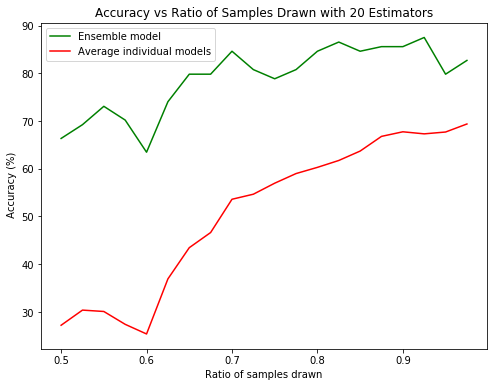

In [144]:
plt.figure(figsize=(8.0, 6.0))
plt.plot(num_samples, acc_varying_samples, color='green', label='Ensemble model')
plt.plot(num_samples, acc_varying_samples_ave, color='red', label='Average individual models')
plt.title('Accuracy vs Ratio of Samples Drawn with 20 Estimators')
plt.xlabel('Ratio of samples drawn')
plt.ylabel(' Accuracy (%)')
plt.legend(loc='best')

Accuracy of base estimator with no pre PCA = 86.54%
Accuracy of base estimator with pre PCA applied = 87.50%
Accuracy of sub model  1  = 80.77%
Accuracy of sub model  2  = 89.42%
Accuracy of sub model  3  = 84.62%
Accuracy of sub model  4  = 85.58%
Accuracy of sub model  5  = 87.50%
Accuracy of sub model  6  = 85.58%
Accuracy of sub model  7  = 84.62%
Accuracy of sub model  8  = 84.62%
Accuracy of sub model  9  = 86.54%
Accuracy of sub model  10  = 86.54%
Accuracy of sub model  11  = 84.62%
Accuracy of sub model  12  = 85.58%
Accuracy of sub model  13  = 86.54%
Accuracy of sub model  14  = 86.54%
Accuracy of sub model  15  = 83.65%
Accuracy of sub model  16  = 84.62%
Accuracy of sub model  17  = 86.54%
Accuracy of sub model  18  = 86.54%
Accuracy of sub model  19  = 82.69%
Accuracy of sub model  20  = 89.42%
Average accuracy of sub models = 85.62%
Accuracy of ensemble estimator = 90.38%


<Figure size 432x288 with 0 Axes>

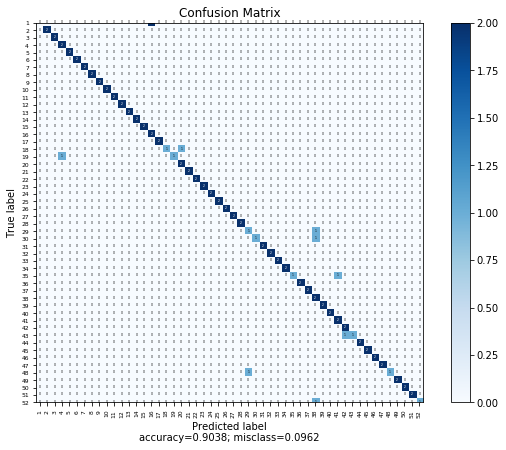

In [147]:
from sklearn.metrics import confusion_matrix
import itertools

D, N = data_train.shape
n_estimators = 20
max_samples = 0.9

verbose = True

standard = False
#M__pca_ideal = 147
#M__lda_ideal = 46

M_pca_bag = N-1

M_pca = 134 #M__pca_ideal
M_lda = 50 #M__lda_ideal

estimators = [('pca', PCA(n_components=M_pca)), ('lda', LinearDiscriminantAnalysis(n_components=M_lda)), ('knn', KNeighborsClassifier(n_neighbors=1))]

base_est = Pipeline (estimators)

base_est.fit(data_train.T, label_train.T.ravel())

acc = base_est.score(data_test.T, label_test.T.ravel())
if verbose:
    print ('Accuracy of base estimator with no pre PCA = %.2f%%' % (acc * 100))


pca = PCA(n_components=M_pca_bag)
W_train = pca.fit_transform(data_train.T)
W_test = pca.transform(data_test.T)

base_est.fit(W_train, label_train.T.ravel())

acc = base_est.score(W_test, label_test.T.ravel())
if verbose:
    print ('Accuracy of base estimator with pre PCA applied = %.2f%%' % (acc * 100))

estimators = []
sub_model_accuracies = []

for i in range (n_estimators):
    mask = np.random.choice(np.arange(N), int(max_samples * N), replace=False)
    mask = np.array(mask).ravel()
    W_bag = W_train[mask, :]
    y_bag = label_train[:, mask]
    estimator = clone(base_est)
    estimator.fit(W_bag, y_bag.T.ravel())
  
    name = 'est_'+str(i+1)
    estimators.append((name, estimator))
    
    sub_model_acc = estimator.score(W_test, label_test.T.ravel())
    sub_model_accuracies.append(sub_model_acc)
    if verbose:
        print ('Accuracy of sub model ', i+1, ' = %.2f%%' % (sub_model_acc * 100))
    
ave_sub_model_acc = sum(sub_model_accuracies)/n_estimators
if verbose:
    print ('Average accuracy of sub models = %.2f%%' % (ave_sub_model_acc * 100))
    
y_hat = []

for w in W_test:
    prediction_sum = 0
    predictions = np.empty(n_estimators, dtype = np.int64)
    for i, (name, estimator) in enumerate(estimators):
        y = estimator.predict(w.reshape(1, -1))
        
        prediction_sum = prediction_sum + float(y[0])
        predictions[i] = int(y[0])
    prediction = round(prediction_sum/n_estimators)
        
    counts = np.bincount(predictions)
    #y_hat.append(prediction)
    y_hat.append(np.argmax(counts))
    
acc = accuracy_score(label_test.T, y_hat)
if verbose:
    print ('Accuracy of ensemble estimator = %.2f%%' % (acc * 100))
    
    
cfn_matrix = confusion_matrix(label_test.T, y_hat)

class_names = np.arange(1,53)

plt.figure()

plot_confusion_matrix(cm           = cfn_matrix, 
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

plt.show()

In [165]:
# Random subspace



from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone
X_train = data_train
y_train = label_train
X_test = data_test
y_test = label_test
def random_subspace(n_estimators, M0, M1, verbose = False):

    D, N = X_train.shape

    standard = False

    #if verbose:
    #    print ('M__pca_ideal = ', M__pca_ideal)
    #    print ('M__lda_ideal = ', M__lda_ideal)

    M_pca_bag = N-1

    M_pca = 134 #M__pca_ideal
    M_lda = 50 #M__lda_ideal

    
    assert(M1 <= (N-1-M0))
    assert(M0+M1 > M_lda)

    estimators = [('lda', LinearDiscriminantAnalysis(n_components=M_lda)), ('knn', KNeighborsClassifier(n_neighbors=1))]

    base_est = Pipeline (estimators)

    base_est.fit(X_train.T, y_train.T.ravel())

    acc = base_est.score(X_test.T, y_test.T.ravel())
    if verbose:
        print ('Accuracy of base estimator with no pre PCA = %.2f%%' % (acc * 100))


    pca = PCA(n_components=M_pca_bag)
    W_train = pca.fit_transform(X_train.T)
    W_test = pca.transform(X_test.T)

    base_est.fit(W_train, y_train.T.ravel())

    acc = base_est.score(W_test, y_test.T.ravel())
    if verbose:
        print ('Accuracy of base estimator with pre PCA applied = %.2f%%' % (acc * 100))

    estimators = []
    sub_model_accuracies = []
    masks = []

    for i in range (n_estimators):

        mask0 = np.arange(M0)
        mask1 = np.random.choice(np.arange(M0, (N-1)), M1, replace=False)

        mask1 = np.array(mask1).ravel()
    
        mask = np.concatenate((mask0, mask1), axis = None)
        masks.append(mask)

        W_bag = W_train[:, mask]
        y_bag = y_train
    
        estimator = clone(base_est)

        estimator.fit(W_bag, y_bag.T.ravel())
    
        name = 'est_'+str(i+1)
        estimators.append((name, estimator))
    
        sub_model_acc = estimator.score(W_test[:, mask], y_test.T.ravel())
        sub_model_accuracies.append(sub_model_acc)
        if verbose:
            print ('Accuracy of sub model ', i+1, ' = %.2f%%' % (sub_model_acc * 100))
    

    ave_sub_model_acc = sum(sub_model_accuracies)/n_estimators
    if verbose:
        print ('Average accuracy of sub models = %.2f%%' % (ave_sub_model_acc * 100))
    
    y_hat = []

    for w in W_test:
        prediction_sum = 0
        predictions = np.empty(n_estimators, dtype = np.int64)
        for i, (name, estimator) in enumerate(estimators):
            y = estimator.predict(w[masks[i]].reshape(1, -1))
        
            prediction_sum = prediction_sum + float(y[0])
            predictions[i] = int(y[0])
        prediction = round(prediction_sum/n_estimators)
    
        counts = np.bincount(predictions)
        #y_hat.append(prediction)
        y_hat.append(np.argmax(counts))
        
    acc = accuracy_score(y_test.T, y_hat)
    if verbose:
        print ('Accuracy of ensemble estimator = %.2f%%' % (acc * 100))
        
    return acc, ave_sub_model_acc
    
D, N = X_train.shape      
        
n_estimators = 20
M0 = 120
M1 = 60    

acc, ave_sub_model_acc = random_subspace(n_estimators, M0, M1, verbose= True)

n_estimators = 20
M0 = 0
M1 = 150-M0+1 

acc_varying_subspace = []
num_M0 = []
num_M1 = []

M0_ideal = None
M1_ideal = None
acc_max = 0

while M0 <= N-1:
    M1 = max((47-M0+1), 0)
    num_M1_i = []
    acc_varying_subspace_i = []
    while M1 <= (N-1-M0):
        acc, ave_sub_model_acc = random_subspace(n_estimators, M0, M1)
        acc_varying_subspace_i.append((acc*100))
        num_M1_i.append(M1)
        
        if (acc > acc_max):
            M0_ideal = M0
            M1_ideal = M1
            acc_max = acc
        
        M1 = M1 + 20
        
    num_M1.append(num_M1_i)
    acc_varying_subspace.append(acc_varying_subspace_i)
    num_M0.append(M0)
    M0 = M0 + 50

print ("Accuracy is maximum for M0 = ", M0_ideal, ", M1 = ", M1_ideal, " with accuracy of %.2f%%"% (acc_max * 100), ".")

# Accuracy is maximum for M0 =  100 , M1 =  111  with accuracy of 96.15% .

n_estimators = 1
M0 = 120
M1 = 60

acc_varying_num_est_ran_subsp = []

while n_estimators <= n_est_test_range:
    acc, ave_sub_model_acc = random_subspace(n_estimators, M0, M1)
    acc_varying_num_est_ran_subsp.append(acc*100)
    n_estimators = n_estimators + 1

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of base estimator with no pre PCA = 92.31%


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of base estimator with pre PCA applied = 14.42%
Accuracy of sub model  1  = 86.54%
Accuracy of sub model  2  = 84.62%
Accuracy of sub model  3  = 88.46%
Accuracy of sub model  4  = 88.46%
Accuracy of sub model  5  = 85.58%
Accuracy of sub model  6  = 83.65%
Accuracy of sub model  7  = 86.54%
Accuracy of sub model  8  = 86.54%
Accuracy of sub model  9  = 87.50%
Accuracy of sub model  10  = 85.58%
Accuracy of sub model  11  = 87.50%
Accuracy of sub model  12  = 85.58%
Accuracy of sub model  13  = 81.73%
Accuracy of sub model  14  = 82.69%
Accuracy of sub model  15  = 88.46%
Accuracy of sub model  16  = 86.54%
Accuracy of sub model  17  = 87.50%
Accuracy of sub model  18  = 87.50%
Accuracy of sub model  19  = 84.62%
Accuracy of sub model  20  = 88.46%
Average accuracy of sub models = 86.20%
Accuracy of ensemble estimator = 89.42%


AssertionError: ignored

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260]


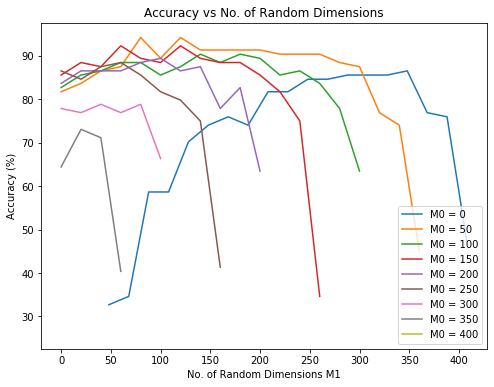

In [164]:
print (num_M1[3])
plt.figure(figsize=(8.0, 6.0))
for i in range(len(num_M0)):
    plt.plot(num_M1[i], acc_varying_subspace[i], label='M0 = '+str(num_M0[i]))

plt.title('Accuracy vs No. of Random Dimensions')
plt.xlabel('No. of Random Dimensions M1')
plt.ylabel('Accuracy (%)')
plt.legend(loc='lower right')

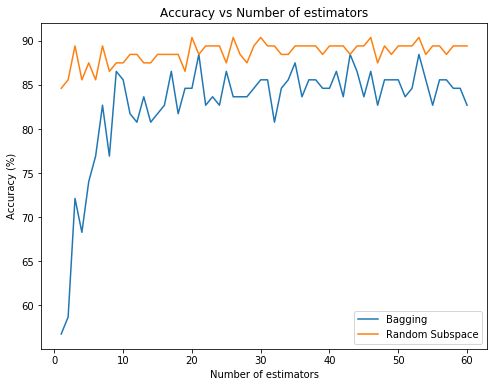

In [156]:
plt.figure(figsize=(8.0, 6.0))
plt.plot(num_estimators_list, acc_varying_num_est_bag, label='Bagging')
plt.plot(num_estimators_list, acc_varying_num_est_ran_subsp, label='Random Subspace')
plt.title('Accuracy vs Number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')

In [158]:
print(M0_ideal, M1_ideal)

50 80


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of base estimator with no pre PCA = 92.31%


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of base estimator with pre PCA applied = 14.42%
Accuracy of sub model  1  = 79.81%
Accuracy of sub model  2  = 83.65%
Accuracy of sub model  3  = 80.77%
Accuracy of sub model  4  = 80.77%
Accuracy of sub model  5  = 85.58%
Accuracy of sub model  6  = 84.62%
Accuracy of sub model  7  = 81.73%
Accuracy of sub model  8  = 80.77%
Accuracy of sub model  9  = 82.69%
Accuracy of sub model  10  = 81.73%
Accuracy of sub model  11  = 82.69%
Accuracy of sub model  12  = 81.73%
Accuracy of sub model  13  = 79.81%
Accuracy of sub model  14  = 79.81%
Accuracy of sub model  15  = 79.81%
Accuracy of sub model  16  = 81.73%
Accuracy of sub model  17  = 79.81%
Accuracy of sub model  18  = 77.88%
Accuracy of sub model  19  = 81.73%
Accuracy of sub model  20  = 79.81%
Average accuracy of sub models = 81.35%
Accuracy of ensemble estimator = 88.46%


<Figure size 432x288 with 0 Axes>

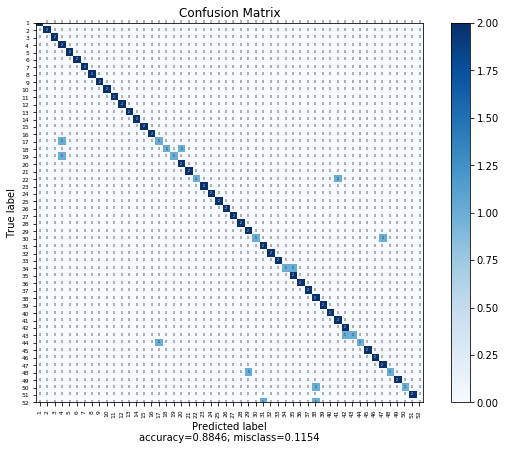

In [163]:
from sklearn.metrics import confusion_matrix
import itertools

D, N = X_train.shape      
        
n_estimators = 20
M0 = M0_ideal
M1 = M1_ideal  

verbose = True

standard = False
#M__pca_ideal = 147
#M__lda_ideal = 46

#if verbose:
#    print ('M__pca_ideal = ', M__pca_ideal)
#    print ('M__lda_ideal = ', M__lda_ideal)

M_pca_bag = N-1

M_pca = 134 #M__pca_ideal
M_lda = 50 #M__lda_ideal

    
assert(M1 <= (N-1-M0))
assert(M_pca > M_lda)

estimators = [('lda', LinearDiscriminantAnalysis(n_components=M_lda)), ('knn', KNeighborsClassifier(n_neighbors=1))]

base_est = Pipeline (estimators)

base_est.fit(X_train.T, y_train.T.ravel())

acc = base_est.score(X_test.T, y_test.T.ravel())
if verbose:
    print ('Accuracy of base estimator with no pre PCA = %.2f%%' % (acc * 100))


pca = PCA(n_components=M_pca_bag)
W_train = pca.fit_transform(X_train.T)
W_test = pca.transform(X_test.T)

base_est.fit(W_train, y_train.T.ravel())

acc = base_est.score(W_test, y_test.T.ravel())
if verbose:
    print ('Accuracy of base estimator with pre PCA applied = %.2f%%' % (acc * 100))

estimators = []
sub_model_accuracies = []
masks = []

for i in range (n_estimators):

    mask0 = np.arange(M0)
    mask1 = np.random.choice(np.arange(M0, (N-1)), M1, replace=False)

    mask1 = np.array(mask1).ravel()
    
    mask = np.concatenate((mask0, mask1), axis = None)
    masks.append(mask)

    W_bag = W_train[:, mask]
    y_bag = y_train
    
    estimator = clone(base_est)

    estimator.fit(W_bag, y_bag.T.ravel())
    
    name = 'est_'+str(i+1)
    estimators.append((name, estimator))
    
    sub_model_acc = estimator.score(W_test[:, mask], y_test.T.ravel())
    sub_model_accuracies.append(sub_model_acc)
    if verbose:
        print ('Accuracy of sub model ', i+1, ' = %.2f%%' % (sub_model_acc * 100))
    

ave_sub_model_acc = sum(sub_model_accuracies)/n_estimators
if verbose:
    print ('Average accuracy of sub models = %.2f%%' % (ave_sub_model_acc * 100))
    
y_hat = []

for w in W_test:
    prediction_sum = 0
    predictions = np.empty(n_estimators, dtype = np.int64)
    for i, (name, estimator) in enumerate(estimators):
        y = estimator.predict(w[masks[i]].reshape(1, -1))
        
        prediction_sum = prediction_sum + float(y[0])
        predictions[i] = int(y[0])
    prediction = round(prediction_sum/n_estimators)
    
    counts = np.bincount(predictions)
    #y_hat.append(prediction)
    y_hat.append(np.argmax(counts))
        
acc = accuracy_score(y_test.T, y_hat)
if verbose:
    print ('Accuracy of ensemble estimator = %.2f%%' % (acc * 100))

cfn_matrix = confusion_matrix(y_test.T, y_hat)

class_names = np.arange(1,53)

plt.figure()

plot_confusion_matrix(cm           = cfn_matrix, 
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

plt.show()